In [1]:
import numpy as np 
import matplotlib.pyplot as plt

mu = np.array([0.08, 0.14, 0.16])
sigma = np.array([[0.1**2, 0.006 , 0.007],[0.006,0.3**2, 0.021], [0.007,0.021,0.35**2]])
one = np.ones(3)
A = one.transpose() @ np.linalg.inv(sigma) @ one
B =  one.transpose() @ np.linalg.inv(sigma) @ mu
w = (1/(B-A*0.05)) *  np.linalg.inv(sigma) @ (mu - 0.05*one)
print(w)

mu_tan = w.transpose() @ mu 
print(mu_tan)
var_tan = w.transpose() @ sigma @ w
print(var_tan)

sr_tan = (mu_tan - 0.05)/np.sqrt(var_tan)
print(sr_tan)



[0.60858939 0.20286313 0.18854749]
0.10725558659217878
0.016456982850098313
0.4463163124162761


In [2]:
C = mu.transpose() @ np.linalg.inv(sigma) @ mu 
delta = A*C - B**2
mu_z = 0.05
lam = (C - mu_z *B)/delta
gamma  = (mu_z * A - B)/delta 
w_z = lam * np.linalg.inv(sigma) @ one + gamma*np.linalg.inv(sigma) @ mu
print(w_z)

var_z = w_z.transpose() @ sigma @ w_z
print(var_z)



[ 1.42362301 -0.19449204 -0.22913097]
0.024085189718482232


2.6762353292965537


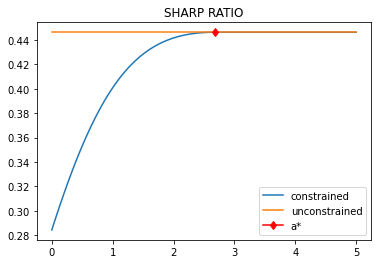

In [6]:
a_star = sr_tan/(var_tan**0.5)  *(1/1.3)
print(a_star)

#calculate sharp ratios for the constrained portfolio 
x_tan = lambda  a: (mu_tan - mu_z)/(a*(var_tan + var_z)) + (1.3 * var_z)/(var_tan + var_z)
a = np.linspace(0.0001,5,100)
sr_c = []
for i,j in enumerate(a):
    if j > a_star:
        w_c =  sr_tan/(j*var_tan**0.5) * w
    else:
        w_c = x_tan(j) * w + (1.3-x_tan(j))*w_z
        
    mu_c = mu.transpose() @ w_c  +  (1 - w_c.transpose() @ one)*0.05
    var_c = w_c.transpose() @ sigma @ w_c
    sr_c.append((mu_c - 0.05)/(var_c**0.5))

    
    
#let's consider the unconstrained portfolio sharpratio 
sr_u = [sr_tan for i in range(100)]

plt.plot(a, sr_c, label="constrained")
plt.plot(a, sr_u, label="unconstrained")
plt.plot(a_star, sr_tan, marker="d", color="red", label="a*")
plt.legend()
plt.title("SHARP RATIO")
plt.show()

#we can see that when a is smaller than the cut off risk aversion coefficient the sharpe ratio
#tends to decrease towards 0, for values close to 0 the sharpe ratio is around 0.28





        
        
       
    

In [11]:
#exercise 2 BAB
a_L, a_H, b_L, b_H = 2.36/100, -4.36/100, 0.55, 1.78
alpha = lambda y: y*(a_L - b_L/b_H *a_H)
sigma = lambda y: y*0.12*(1+(b_L/b_H)**2 )**(0.5)
ir = lambda y:  alpha(y)/sigma(y)
print(alpha(1))
print(sigma(1))
print(ir(1))

0.03707191011235955
0.12559787582123638
0.295163511882351


In [44]:
ex_m = 0.075
sigma_m = 0.14
sr_m = ex_m/sigma_m
w_BAB = lambda y: (ir(y) * (1/sigma(y))) / (ir(y) * (1/sigma(y)) + sr_m * ( 1/sigma_m))
BAB = np.array([1, -b_L/b_H, 1- b_L/b_H])
w_BAB(1)/(1-w_BAB(1))  * b_L/b_H

max_r = lambda y: (sr_m **2 + ir(y)**2)**0.5
max_r(10)
#note that max_r does not depend on y 
print(max_r(1), max_r(100))

0.6116463804070863 0.6116463804070863
